In [1]:
# Import Dependencies
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from scipy.misc import imresize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

c:\users\ad1026858\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Text(0.5,1,'Original Image')

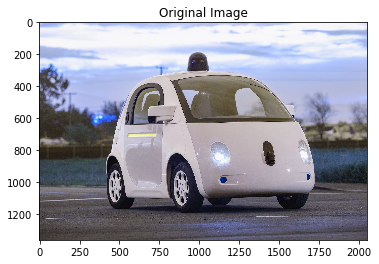

In [2]:
# Load Image
img = cv2.imread('./image.jpg')

plt.imshow(img)
plt.title('Original Image')

Text(0.5,1,'Grayscal Image')

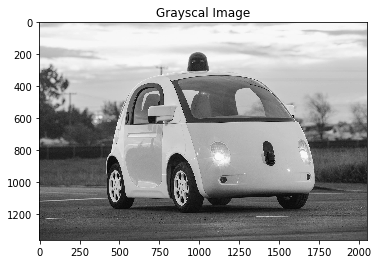

In [3]:
# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscal Image')

c:\users\ad1026858\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Text(0.5,1,'Resized Image')

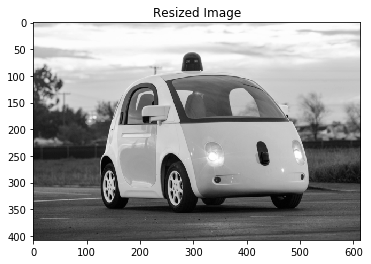

In [4]:
# Resized Image
resized_img = imresize(gray, 0.3)
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image')

In [5]:
# Define Image Filters
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

filter1 = filter_vals
filter2 = -filter1
filter3 = filter1.T
filter4 = -filter3

filters = [filter1, filter2, filter3, filter4]

In [6]:
filters

[array([[-1, -1,  1,  1],
        [-1, -1,  1,  1],
        [-1, -1,  1,  1],
        [-1, -1,  1,  1]]), array([[ 1,  1, -1, -1],
        [ 1,  1, -1, -1],
        [ 1,  1, -1, -1],
        [ 1,  1, -1, -1]]), array([[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [ 1,  1,  1,  1],
        [ 1,  1,  1,  1]]), array([[ 1,  1,  1,  1],
        [ 1,  1,  1,  1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1]])]

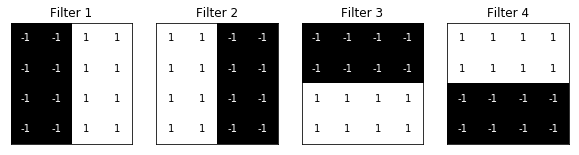

In [7]:
# visualize all filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

### Visualize Activation Maps for Filters

In [8]:
# Make Keras Model
model = Sequential()
model.add(Convolution2D(1, (4,4), activation='relu', input_shape=(resized_img.shape[0], resized_img.shape[1], 1)))

In [9]:
# Apply Convolutional Filter to Image and Return Output
def apply_filter(img, idx, filters, ax):
    # Set the Weights of the Filter in the Convolutional Layer to Filters[i]
    model.layers[0].set_weights([np.reshape(filters[i], (4,4,1,1)), np.array([0])])
    # Plot the Corresponding Activation Map
    ax.imshow(np.squeeze(model.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

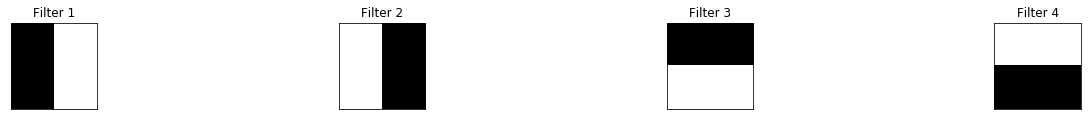

In [10]:
# Visualize all Filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

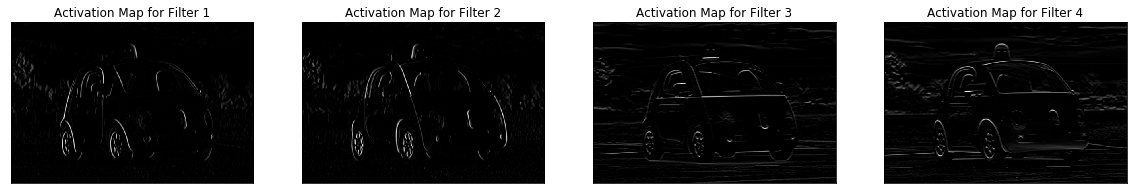

In [11]:
# Visualize all Activation Maps
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    apply_filter(resized_img, i, filters, ax)
    ax.set_title('Activation Map for Filter %s' % str(i+1))